In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [117]:
geo = pd.read_csv('geography.csv')
geo

,post_date,state,count_id_indexed
0,2020-03-01,NaN,1.0000
1,2020-03-01,AK,1.0000
2,2020-03-01,AL,1.0000
3,2020-03-01,AR,1.0000
4,2020-03-01,AZ,1.0000
...,...,...,...
34133,2021-09-20,VT,1.2268
34134,2021-09-20,WA,0.9157
34135,2021-09-20,WI,1.1750
34136,2021-09-20,WV,1.1330


In [27]:
geo.isnull().sum()/len(geo)

post_date           0.000000
state               0.016609
count_id_indexed    0.000000
dtype: float64

In [118]:
#mode imputation for nulls
geo['state'] = geo['state'].fillna(geo['state'].mode()[0])
geo.isnull().sum()

post_date           0
state               0
count_id_indexed    0
dtype: int64

In [59]:
geo['state'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'Pi', 'PR', 'RI', 'SC', 'SD',
       'Sh', 'St', 'TN', 'TX', 'Un', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI',
       'WV', 'WY', 'AS', 'GU', 'Ly', 'MP', 'So', 'ON', 'Ha', 'SK', 'La',
       'AB', 'BS', 'ZH', 'BC', 'Ka', 'MB', 'Ko', 'W', 'N�', 'SP', 'Ch',
       'Be', 'Cu', 'Na', 'Te', 'LU', 'ZG', 'SG', 'UM', 'Bu', '??', 'KA',
       'BW', 'QC', 'EN', 'A', 'TA', 'NS', 'C', 'C ', 'C0', 'CU', 'JK',
       '8�', 'BY'], dtype=object)

In [119]:
#mode imputation for weird values 
state_codes = pd.read_csv('state-codes.csv').replace('WY ', 'WY')
def fill_state(state):
    if str(state) in np.array(state_codes['Alpha Code']):
        return state
    else:
        return geo['state'].mode()[0]
geo['state'] = geo['state'].apply(fill_state)

In [120]:
geo['state'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [250]:
geo['post_date'] = pd.to_datetime(geo['post_date'])
geo.isnull().sum()

post_date           0
state               0
count_id_indexed    0
dtype: int64

In [251]:
geo.to_csv('cleaned_geo.csv')

<AxesSubplot:xlabel='state'>

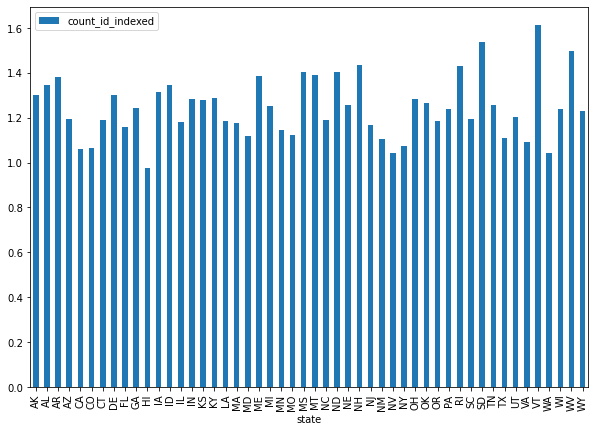

In [158]:
geo.groupby('state').mean().reset_index().plot.bar(x='state', y='count_id_indexed', figsize=(10, 7))

<AxesSubplot:xlabel='state'>

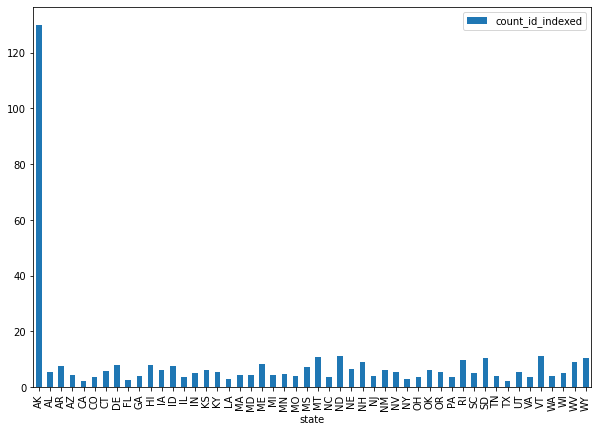

In [156]:
geo.groupby('state').max().reset_index().plot.bar(x='state', y='count_id_indexed', figsize=(10, 7))

<AxesSubplot:xlabel='state'>

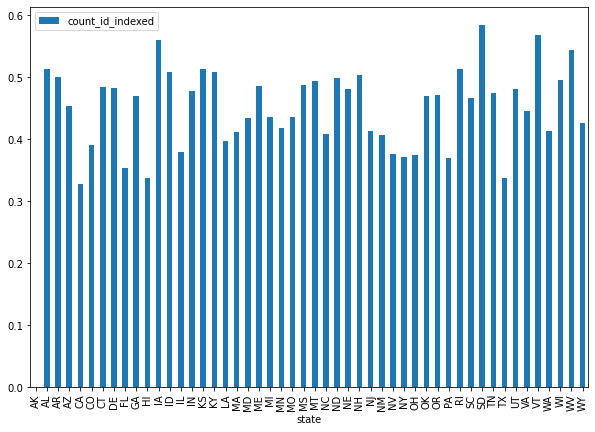

In [159]:
geo.groupby('state').min().reset_index().plot.bar(x='state', y='count_id_indexed', figsize=(10, 7))

<AxesSubplot:xlabel='post_date'>

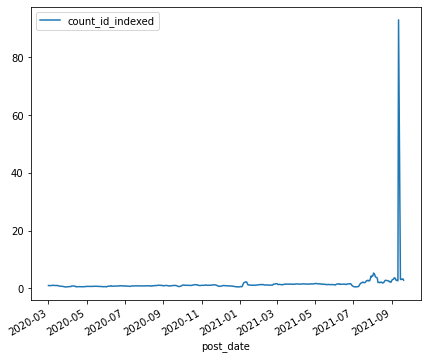

In [167]:
geo['post_date'] = pd.to_datetime(geo['post_date'])
geo.groupby('post_date').mean().plot(figsize=(7, 6))

In [208]:
geo_ind = pd.read_csv('geography_industry.csv')
geo_ind

,post_date,state,industry,count_id_indexed
0,2020-03-01,NaN,NaN,1.0000
1,2020-03-01,NaN,Communication,1.0000
2,2020-03-01,NaN,Construction,1.0000
3,2020-03-01,NaN,Energy,1.0000
4,2020-03-01,NaN,Entertainment,1.0000
...,...,...,...,...
546203,2021-09-20,WY,Real Estate,2.8571
546204,2021-09-20,WY,Retail,1.3936
546205,2021-09-20,WY,Services,1.4001
546206,2021-09-20,WY,Transportation,0.4458


Imputation

In [209]:
geo_ind.isnull().sum()/len(geo_ind)

post_date           0.000000
state               0.016609
industry            0.062500
count_id_indexed    0.000000
dtype: float64

In [210]:
def fill_industry(industry):
    if pd.isna(industry):
        return geo_ind.sample()['industry'].iloc[0]
    else:
        return industry

In [212]:
#geo_ind['industry'] = geo_ind['industry'].apply(fill_industry)

In [213]:
#mode imputation for null states
geo_ind['state'] = geo_ind['state'].fillna(geo_ind['state'].mode()[0])
#mode imputation for weird states 
geo_ind['state'] = geo_ind['state'].apply(fill_state)
#mode imputation for industry 
geo_ind['industry'] = geo_ind['industry'].fillna(geo_ind['industry'].mode()[0])

In [214]:
geo_ind.isnull().sum()/len(geo_ind)

post_date           0.0
state               0.0
industry            0.0
count_id_indexed    0.0
dtype: float64

<AxesSubplot:xlabel='industry'>

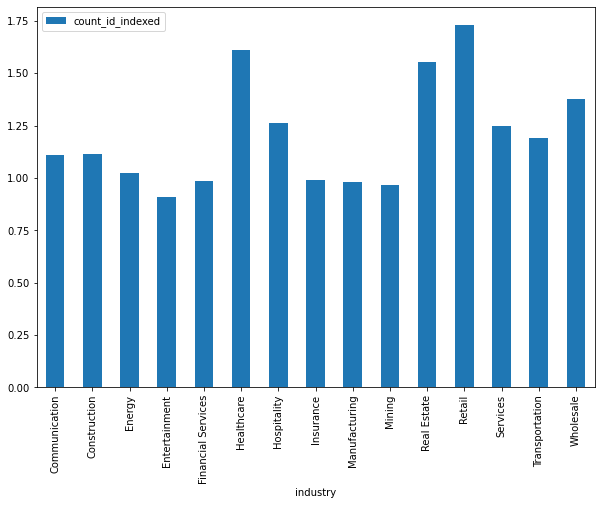

In [222]:
geo_ind['post_date'] = pd.to_datetime(geo_ind['post_date'])
geo_ind.groupby('industry').mean().reset_index().plot.bar(x='industry', y='count_id_indexed', figsize=(10, 7))

<AxesSubplot:xlabel='industry'>

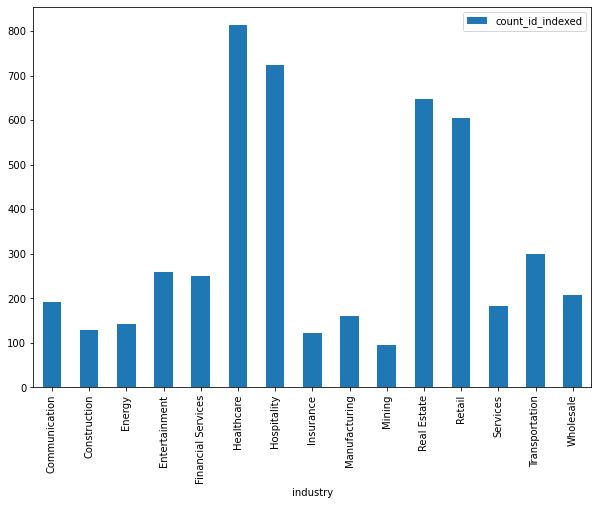

In [223]:
geo_ind.groupby('industry').max().reset_index().plot.bar(x='industry', y='count_id_indexed', figsize=(10, 7))

<AxesSubplot:xlabel='post_date'>

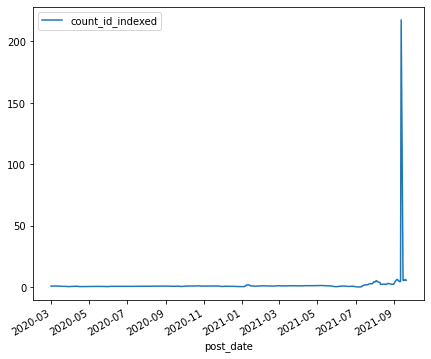

In [226]:
geo_ind.groupby('post_date').mean().plot(figsize=(7, 6))

In [5]:
ind = pd.read_csv('industry.csv')
ind

,post_date,industry,count_id_indexed
0,2020-03-01,NaN,1.0000
1,2020-03-01,Communication,1.0000
2,2020-03-01,Construction,1.0000
3,2020-03-01,Energy,1.0000
4,2020-03-01,Entertainment,1.0000
...,...,...,...
9067,2021-09-20,Real Estate,1.9053
9068,2021-09-20,Retail,2.0609
9069,2021-09-20,Services,1.8623
9070,2021-09-20,Transportation,1.7572


In [228]:
ind.isnull().sum()/len(ind)

post_date           0.0000
industry            0.0625
count_id_indexed    0.0000
dtype: float64

In [229]:
ind['industry'] = ind['industry'].fillna(ind['industry'].mode()[0])
ind['post_date'] = pd.to_datetime(ind['post_date'])

In [230]:
ind.isnull().sum()/len(ind)

post_date           0.0
industry            0.0
count_id_indexed    0.0
dtype: float64

In [6]:
ind_fam = pd.read_csv('industry_job_family.csv')
ind_fam

,post_date,industry,job_family,count_id_indexed
0,2020-03-01,NaN,NaN,1.0000
1,2020-03-01,NaN,Customer Service,1.0000
2,2020-03-01,NaN,Entertainment and Recreation,1.0000
3,2020-03-01,NaN,Facilities/Constr,1.0000
4,2020-03-01,NaN,Finance/Insurance,1.0000
...,...,...,...,...
162774,2021-09-20,Wholesale,Sales,1.9490
162775,2021-09-20,Wholesale,Security,7.7942
162776,2021-09-20,Wholesale,Skilled Trades,2.5048
162777,2021-09-20,Wholesale,Supply Chain Staff,2.4621


In [234]:
ind_fam.isnull().sum()/len(ind_fam)

post_date           0.000000
industry            0.065721
job_family          0.050271
ind_family_count    0.000000
dtype: float64

In [235]:
#mode imputation for industry 
ind_fam['industry'] = ind_fam['industry'].fillna(ind_fam['industry'].mode()[0])
#mode imputation for job_family
ind_fam['job_family'] = ind_fam['job_family'].fillna(ind_fam['job_family'].mode()[0])
ind_fam['post_date'] = pd.to_datetime(ind_fam['post_date'])

In [236]:
ind_fam.isnull().sum()/len(ind_fam)

post_date           0.0
industry            0.0
job_family          0.0
ind_family_count    0.0
dtype: float64

In [7]:
fam = pd.read_csv('job_family.csv')
fam

,post_date,job_family,count_id_indexed
0,2020-03-01,NaN,1.0000
1,2020-03-01,Customer Service,1.0000
2,2020-03-01,Entertainment and Recreation,1.0000
3,2020-03-01,Facilities/Constr,1.0000
4,2020-03-01,Finance/Insurance,1.0000
...,...,...,...
10693,2021-09-20,Sales,1.6536
10694,2021-09-20,Security,1.7130
10695,2021-09-20,Skilled Trades,2.2378
10696,2021-09-20,Supply Chain Staff,1.7979


In [238]:
#mode imputation for job_family
fam['job_family'] = fam['job_family'].fillna(fam['job_family'].mode()[0])
fam['post_date'] = pd.to_datetime(fam['post_date'])

In [242]:
fam.isnull().sum()/len(fam)

post_date           0.0
job_family          0.0
count_id_indexed    0.0
dtype: float64

In [8]:
fam_role = pd.read_csv('job_family_role.csv')
fam_role

,post_date,job_family,role,count_id_indexed
0,2020-03-01,NaN,EXCUDE,1.0000
1,2020-03-01,Customer Service,Call Center Manager,1.0000
2,2020-03-01,Customer Service,Customer Service Manager,1.0000
3,2020-03-01,Customer Service,Customer Service Representative,1.0000
4,2020-03-01,Customer Service,Customer Support Representative,1.0000
...,...,...,...,...
619914,2021-09-20,Unassigned,Project Coordinator,0.8639
619915,2021-09-20,Unassigned,Project Manager,0.5298
619916,2021-09-20,Unassigned,Shift Manager,2.5717
619917,2021-09-20,Unassigned,Team Member,0.1535


In [243]:
#mode imputation for job_family
fam_role['job_family'] = fam_role['job_family'].fillna(fam_role['job_family'].mode()[0])
#mode imputation for role
fam_role['role'] = fam_role['role'].fillna(fam_role['role'].mode()[0])
fam_role['post_date'] = pd.to_datetime(fam_role['post_date'])

In [244]:
fam_role.isnull().sum()/len(fam_role)

post_date           0.0
job_family          0.0
role                0.0
count_id_indexed    0.0
dtype: float64

In [9]:
overall = pd.read_csv('overall.csv')
overall

,post_date,count_id_indexed
0,2020-03-01,1.0000
1,2020-03-02,1.0100
2,2020-03-03,1.0223
3,2020-03-04,1.0461
4,2020-03-05,1.0582
...,...,...
562,2021-09-16,1.9723
563,2021-09-17,1.9826
564,2021-09-18,2.0087
565,2021-09-19,2.0763


In [246]:
overall.isnull().sum()/len(overall)

post_date           0.0
count_id_indexed    0.0
dtype: float64